<a href="https://colab.research.google.com/github/somersgreg/DS-Unit-2-Linear-Models/blob/greg.somers/module2-regression-2/LS_DS_212_assignment.key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [ ]:
def wrangle(filepath):
    df = pd.read_csv(filepath, parse_dates=['created'], index_col='created')
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    df['Total_rooms'] = df['bedrooms'] + df['bathrooms']
    df['desc_len'] = df['description'].str.len()
    df['pets_allowed'] = (df['dogs_allowed'] + df['cats_allowed'] ==2).astype(int)
    #df['Outdoor_perks'] = df['roof_deck'] + df['outdoor_space'] + df['garden_patio'] + df['common_outdoor_space']
    #df['created'] = pd.to_datetime(df['created'])
    #df.set_index(['created'], inplace=True)
    df.dropna(inplace=True)
     #add number of outdoor perks.       
    return df.sort_index()

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [ ]:
import pandas as pd
import numpy as np


df = wrangle(filepath)

df.head()


,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,Total_rooms,desc_len,pets_allowed
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-01 22:12:41,1.0,1,X-LARGE Flex 1BR Loft! ~~ PRIME Greenwich Vill...,Astor Place,40.7302,-73.9924,3195,1 Astor Place,high,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,94.0,0
2016-04-01 22:56:00,1.0,0,"This Enormous Studio Features: Harwood Floors,...",East 54th Street,40.7576,-73.9677,2000,230 East 54th Street,medium,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,357.0,1
2016-04-01 22:57:15,2.0,3,--- East 31st St & Lexington Avenue --- This S...,East 31st St & Lexington Avenue,40.7388,-73.9851,5850,105 Lexington Avenue,high,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5.0,411.0,1
2016-04-01 23:26:07,1.0,1,Reduced Fee!! Priced To Rent!\rLarge Newly Upd...,West End Ave,40.7939,-73.9738,2745,700 West End Ave,medium,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2.0,816.0,1
2016-04-02 00:48:13,1.0,1,Phenomenal deal of the century!! This spacious...,E 88th street,40.7784,-73.9491,2400,401 E 88th street,medium,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,536.0,1


**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

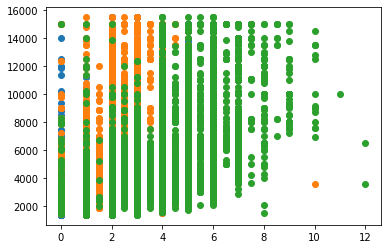

In [ ]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.

df.head()
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(x='bedrooms', y='price', data=df)
plt.scatter(x='bathrooms', y='price', data=df)
plt.scatter(x='Total_rooms', y='price', data=df)
#plt.scatter(x='Outdoor_perks', y='price', data=df)

#sns.regplot(x='Total_rooms', y='price', data=df, fit_reg=True)

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [ ]:
#features = ['bedrooms','Total_rooms', 'Outdoor_perks']

#X = df[features]
#y = df['price']

target = 'price'
X = df.select_dtypes('number').drop(columns=target)
y = df[target]
print(X.shape)
print(y.shape)
X

(47260, 31)
(47260,)


,bathrooms,bedrooms,latitude,longitude,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,Total_rooms,desc_len,pets_allowed
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-01 22:12:41,1.0,1,40.7302,-73.9924,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,94.0,0
2016-04-01 22:56:00,1.0,0,40.7576,-73.9677,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,357.0,1
2016-04-01 22:57:15,2.0,3,40.7388,-73.9851,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5.0,411.0,1
2016-04-01 23:26:07,1.0,1,40.7939,-73.9738,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2.0,816.0,1
2016-04-02 00:48:13,1.0,1,40.7784,-73.9491,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,536.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-29 17:47:34,1.0,2,40.7261,-74.0014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,208.0,0
2016-06-29 17:56:12,1.0,1,40.7358,-73.9560,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0,381.0,1
2016-06-29 18:14:48,1.0,1,40.7597,-73.9890,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,327.0,1


**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [ ]:
#df=df.sort_index()

cutoff = '2016-06-01'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]
#X_train, y_train = X.loc['2016-04-01' : '2016-05-31'], y.loc['2016-04-01' : '2016-05-31']
#X_test, y_test = X.loc['2016-06-01' : '2016-06-30'], y.loc['2016-06-01' : '2016-06-30']

X_train.head()


,bathrooms,bedrooms,latitude,longitude,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,Total_rooms,desc_len,pets_allowed
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-01 22:12:41,1.0,1,40.7302,-73.9924,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,94.0,0
2016-04-01 22:56:00,1.0,0,40.7576,-73.9677,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,357.0,1
2016-04-01 22:57:15,2.0,3,40.7388,-73.9851,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5.0,411.0,1
2016-04-01 23:26:07,1.0,1,40.7939,-73.9738,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2.0,816.0,1
2016-04-02 00:48:13,1.0,1,40.7784,-73.9491,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,536.0,1


# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = [y_train.mean()] * len(y_train)


baseline_mae = mean_absolute_error(y_train, y_pred) 
print('Baseline MAE:', baseline_mae)
print('Mean Apartment rent', y_train.mean())

Baseline MAE: 1202.3983007818476
Mean Apartment rent 3573.2410569369604


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [ ]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [ ]:

training_mae = mean_absolute_error(y_train, model.predict(X_train))

test_mae = mean_absolute_error(y_test, model.predict(X_test))

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 692.5825870871242
Test MAE: 701.1773006806608


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [ ]:
training_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.6164320027205024
Test MAE: 0.6261548870791174


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [ ]:
coefficients = model.coef_
features = X_train.columns

pd.Series(coefficients, index=features).sort_values(key=abs).tail(3)

bathrooms     1016.088304
latitude      1627.683419
longitude   -13591.234455
dtype: float64